In [1]:
options(browser="firefox")
library(microViz)
library(ggplot2)
library(phyloseq)
library('reshape2')
library('dplyr')
library('plyr')
library('vegan')
library("microbiome")

microViz version 0.12.1 - Copyright (C) 2021-2024 David Barnett
! Website: https://david-barnett.github.io/microViz
✔ Useful?  For citation details, run: `citation("microViz")`
✖ Silence? `suppressPackageStartupMessages(library(microViz))`

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: permute

Loading requ

In [2]:
tax <- "data/lineage.tsv"
otu <- "data/otus.tsv"
meta <- "data/meta.tsv"

In [3]:
meta_df <- read.csv(meta, sep = "\t")
rownames(meta_df) <- meta_df$file

In [4]:
meta_df

,file,sample,origin,body_site,simulated
,<chr>,<chr>,<chr>,<chr>,<chr>
SRS013506,SRS013506,SRS013506,gold_standard,buccal mucosa,False
SRS050029,SRS050029,SRS050029,gold_standard,buccal mucosa,False
SRS1041031,SRS1041031,SRS1041031,gold_standard,feces,False
SRS014689,SRS014689,SRS014689,gold_standard,throat,False
SRS065335,SRS065335,SRS065335,gold_standard,throat,False
SRS104912,SRS104912,SRS104912,gold_standard,feces,False
SRS054569,SRS054569,SRS054569,gold_standard,buccal mucosa,False
SRS146847,SRS146847,SRS146847,gold_standard,vagina,False
SRS142957,SRS142957,SRS142957,gold_standard,vagina,False


In [7]:
tax_df <- read.csv(tax, sep = "\t")
rownames(tax_df) <- tax_df$taxon
tax_df <- subset(tax_df, select=-c(taxon))
head(tax_df)

,kindom,phylum,class,order,family,genus,species
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
7,Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,Xanthobacteraceae,Azorhizobium,Azorhizobium caulinodans
9,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Erwiniaceae,Buchnera,Buchnera aphidicola
11,Bacteria,Actinomycetota,Actinomycetes,Micrococcales,Cellulomonadaceae,Cellulomonas,Cellulomonas gilvus
14,Bacteria,Dictyoglomota,Dictyoglomia,Dictyoglomales,Dictyoglomaceae,Dictyoglomus,Dictyoglomus thermophilum
17,Bacteria,Pseudomonadota,Betaproteobacteria,Nitrosomonadales,Methylophilaceae,Methylophilus,Methylophilus methylotrophus
19,Bacteria,Thermodesulfobacteriota,Desulfuromonadia,Desulfuromonadales,Syntrophotaleaceae,Syntrophotalea,Syntrophotalea carbinolica


In [8]:
otu_df <- read.csv(otu, sep = "\t")
rownames(otu_df) <- otu_df$taxon
otu_df<- subset(otu_df, select=-c(taxon))
head(otu_df)

,SRS013506,SRS013506_filtered,SRS014475,SRS014475_filtered,SRS014689,SRS014689_filtered,SRS019352,SRS019352_filtered,SRS050029,SRS050029_filtered,⋯,mess_SRS1041031_filtered,mess_SRS1041129_filtered,mess_SRS104912_filtered,mess_SRS105082_filtered,mess_SRS142957_filtered,mess_SRS143032_filtered,mess_SRS143776_filtered,mess_SRS144378_filtered,mess_SRS146847_filtered,mess_SRS147088_filtered
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3144925,1255322,1255322,214663,214663,870439,870439,247410,247410,5640030,5640030,⋯,1779086,2050592,6319054,10725763,809211,92788,4607248,81389,551333,446526
3144104,730667,730667,104834,104834,480410,480410,148081,148081,397167,397167,⋯,1232188,878299,964961,4933368,320065,49177,37517,67249,54687,410720
3144103,443034,443034,48171,48171,466475,466475,109205,109205,345905,345905,⋯,773499,673813,414854,1262824,47885,10528,26964,51241,26514,378067
3144102,309802,309802,17440,17440,405890,405890,59665,59665,304591,304591,⋯,489826,646485,335173,934534,6406,6695,15080,35542,15152,237597
3143537,274999,274999,9147,9147,397396,397396,43638,43638,183603,183603,⋯,300498,475490,276785,695305,4573,5720,10069,23005,10555,161317
3142977,262116,262116,7778,7778,328409,328409,38055,38055,151317,151317,⋯,258452,374625,250999,492268,3076,4385,9485,18433,8381,102287


In [9]:
OTU <- otu_table(otu_df, taxa_are_rows = T) 

In [10]:
TAX <- tax_table(tax_df)
colnames(TAX) <- colnames(tax_df)
rownames(TAX) <- rownames(tax_df)

Warning message in .local(object):
“Coercing from data.frame class to character matrix 
prior to building taxonomyTable. 
This could introduce artifacts. 
Check your taxonomyTable, or coerce to matrix manually.”


In [11]:
richdf <- data.frame(specnumber(t(OTU))) %>% rename_at('specnumber.t.OTU..', ~'richness')

In [12]:
sam <- merge(meta_df,richdf, by="row.names") %>% arrange(sample) %>% select(! 'Row.names')
SAM <- sample_data(sam)

In [13]:
rownames(SAM) <- SAM$file

In [14]:
SAM$origin <- factor(SAM$origin, levels=c("gold_standard","gs_filtered","camisim","mess"))
SAM$simulated <- factor(SAM$simulated, levels=c("False","True"))
SAM$body_site <- factor(SAM$body_site, levels=unique(SAM$body_site))

In [15]:
ps <- phyloseq(OTU, TAX, SAM)

In [16]:
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11900 taxa and 80 samples ]
sample_data() Sample Data:       [ 80 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 11900 taxa by 7 taxonomic ranks ]

In [43]:
ord_explore(ps)

Short values detected in phyloseq tax_table (nchar<4) :
Consider using tax_fix() to make taxa uniquely identifiable

To stop the app: Click red stop button or hit Esc in the console


Listening on http://127.0.0.1:6420

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


In [96]:
set.seed(1) 
dist = "bray"
method = "NMDS"
trans = "identity"
rank <- "species"
mdist <- ps %>%
 tax_transform(rank = rank, trans = trans) %>%
 dist_calc(dist = dist) 

In [97]:
ord <- 
 ord_calc(mdist,
  method = method
 )

Run 0 stress 0.05555574 
Run 1 stress 0.1241024 
Run 2 stress 0.05555574 
... New best solution
... Procrustes: rmse 6.082511e-06  max resid 2.759697e-05 
... Similar to previous best
Run 3 stress 0.05555574 
... New best solution
... Procrustes: rmse 3.869886e-06  max resid 1.824151e-05 
... Similar to previous best
Run 4 stress 0.05555574 
... Procrustes: rmse 1.460145e-05  max resid 5.572442e-05 
... Similar to previous best
Run 5 stress 0.05555574 
... Procrustes: rmse 1.184274e-05  max resid 4.373001e-05 
... Similar to previous best
Run 6 stress 0.1178434 
Run 7 stress 0.05555574 
... Procrustes: rmse 1.48314e-05  max resid 5.565052e-05 
... Similar to previous best
Run 8 stress 0.1233145 
Run 9 stress 0.1197912 
Run 10 stress 0.1233141 
Run 11 stress 0.05555574 
... Procrustes: rmse 8.395457e-06  max resid 4.142217e-05 
... Similar to previous best
Run 12 stress 0.05555574 
... Procrustes: rmse 7.59362e-06  max resid 2.760969e-05 
... Similar to previous best
Run 13 stress 0.055

In [98]:
stress <-ord_get(ord)$stress
stress

[1] 0.05555574

## NMDS

## Bray

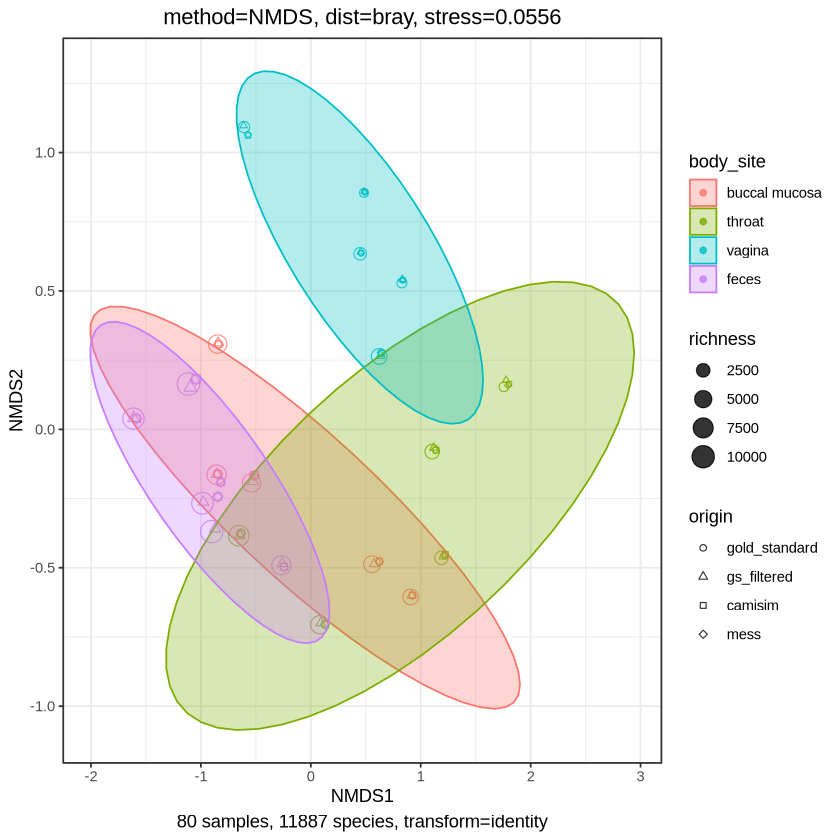

In [88]:
p <- ord_plot(ord,
axes = c(1, 2),
colour = "body_site",
shape = "origin", alpha = 0.8,
size = "richness"
) + 
scale_shape_girafe_filled() +
stat_ellipse(geom = "polygon",aes(group = body_site, color = body_site, fill= body_site), alpha=0.3) +
theme_bw() +
ggtitle(sprintf("method=%s, dist=%s, stress=%s",method, dist,format(stress, digit=3))) +
labs(caption = sprintf("80 samples, 11887 species, transform=%s",trans)) +
theme(plot.caption = element_text(size = 11,hjust=0.5), plot.title = element_text(hjust=0.5))
p

In [27]:
ggsave(sprintf("%s-%s-%s.svg",rank,dist,method),p, dpi = 400, units = "in")

Saving 6.67 x 6.67 in image


## Jaccard

In [47]:
set.seed(1)
dist = "jaccard"
method = "NMDS"
trans = "identity"
rank <- "species"
mdist <- ps %>%
 tax_transform(rank = rank, trans = trans) %>%
 dist_calc(dist = dist) 
ord <- 
 ord_calc(mdist,
  method = method
 )

Run 0 stress 0.05555574 
Run 1 stress 0.1241024 
Run 2 stress 0.05555574 
... New best solution
... Procrustes: rmse 5.344151e-06  max resid 2.704923e-05 
... Similar to previous best
Run 3 stress 0.05555574 
... New best solution
... Procrustes: rmse 3.869886e-06  max resid 1.824151e-05 
... Similar to previous best
Run 4 stress 0.05555574 
... Procrustes: rmse 1.460145e-05  max resid 5.572442e-05 
... Similar to previous best
Run 5 stress 0.05555574 
... Procrustes: rmse 1.184274e-05  max resid 4.373001e-05 
... Similar to previous best
Run 6 stress 0.1178434 
Run 7 stress 0.05555574 
... Procrustes: rmse 1.48314e-05  max resid 5.565052e-05 
... Similar to previous best
Run 8 stress 0.1233145 
Run 9 stress 0.1197912 
Run 10 stress 0.1233141 
Run 11 stress 0.05555574 
... Procrustes: rmse 8.395457e-06  max resid 4.142217e-05 
... Similar to previous best
Run 12 stress 0.05555574 
... Procrustes: rmse 7.59362e-06  max resid 2.760969e-05 
... Similar to previous best
Run 13 stress 0.055

In [48]:
stress <-ord_get(ord)$stress
stress

[1] 0.05555574

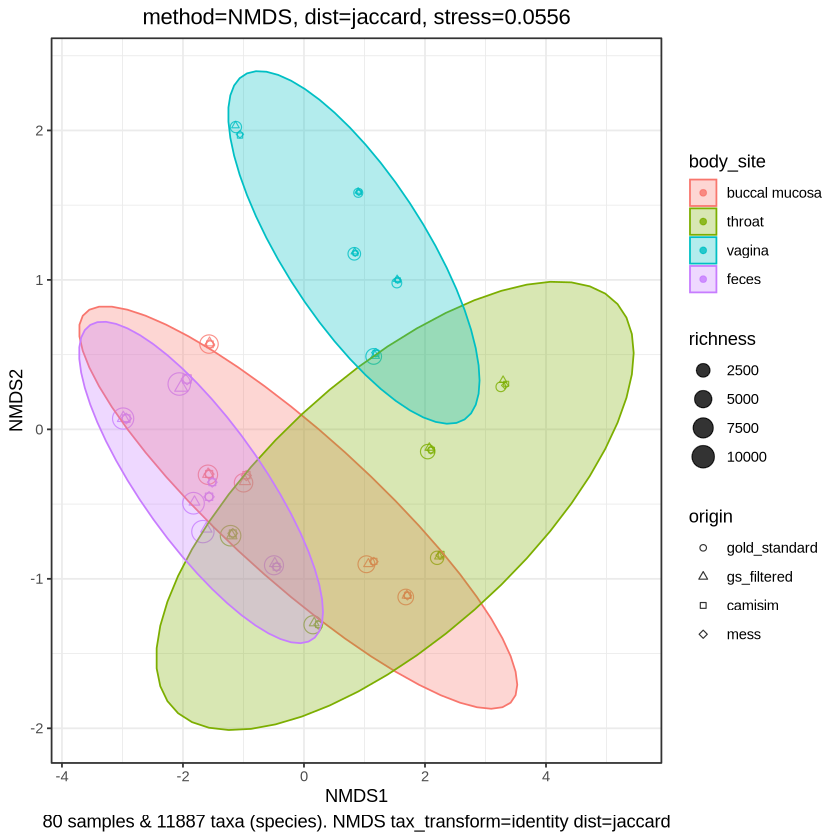

In [49]:
p <- ord_plot(ord,
axes = c(1, 2),
#auto_caption = NA,
colour = "body_site",
shape = "origin", alpha = 0.8,
size = "richness"
) + 
scale_shape_girafe_filled() +
stat_ellipse(geom = "polygon",aes(group = body_site, color = body_site, fill= body_site), alpha=0.3) +
theme_bw() +
ggtitle(sprintf("method=%s, dist=%s, stress=%s",method, dist,format(stress, digit=3))) +
#labs(caption = sprintf("80 samples, 9921 species, transform=%s",trans)) +
theme(plot.caption = element_text(size = 11,hjust=0.5), plot.title = element_text(hjust=0.5))
p

In [50]:
ggsave(sprintf("%s-%s-%s.svg",rank,dist,method),p, dpi = 400, units = "in")

Saving 6.67 x 6.67 in image


## PERMANOVA

In [51]:
perm <- dist_permanova(mdist,
    variables = "origin:simulated+body_site",
    n_perms = 999, 
    n_processes = 3
)
perm

2024-09-13 16:34:33.738229 - Starting PERMANOVA with 999 perms with 3 processes

2024-09-13 16:34:33.911798 - Finished PERMANOVA



psExtra object - a phyloseq object with extra slots:

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11887 taxa and 80 samples ]
sample_data() Sample Data:       [ 80 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 11887 taxa by 7 taxonomic ranks ]

psExtra info:
tax_agg = "species" tax_trans = "identity" 

jaccard distance matrix of size 80 
0.04207191 0.9495808 0.9513022 0.523585 0.5381949 ...

permanova:
Permutation test for adonis under reduced model
Marginal effects of terms
Permutation: free
Number of permutations: 999

vegan::adonis2(formula = formula, data = metadata, permutations = n_perms, by = by, parallel = parall)
                 Df SumOfSqs      R2      F Pr(>F)    
body_site         3   8.1523 0.28937 9.9374  0.001 ***
origin:simulated  3   0.0579 0.00206 0.0706  1.000    
Residual         73  19.9624 0.70857                  
Total            79  28.1726 1.00000                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 

## Beta dispersion

In [52]:
bd <- dist_bdisp(mdist, variables = c("origin","simulated","body_site")) %>%  bdisp_get()
bd

$origin
$origin$model

	Homogeneity of multivariate dispersions

Call: vegan::betadisper(d = distMat, group = meta[[V]], type = method)

No. of Positive Eigenvalues: 61
No. of Negative Eigenvalues: 18

Average distance to centroid:
gold_standard   gs_filtered       camisim          mess 
       0.5918        0.5922        0.5901        0.5900 

Eigenvalues for PCoA axes:
(Showing 8 of 79 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
7.8598 4.0032 3.1551 2.3343 1.6734 1.4768 1.0596 0.9823 

$origin$anova
Analysis of Variance Table

Response: Distances
          Df   Sum Sq    Mean Sq F value Pr(>F)
Groups     3 0.000077 0.00002574  0.0115 0.9983
Residuals 76 0.169653 0.00223228               

$origin$tukeyHSD
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                                   diff         lwr        upr     p adj
gs_filtered-gold_standard  3.167542e-04 -0.03892973

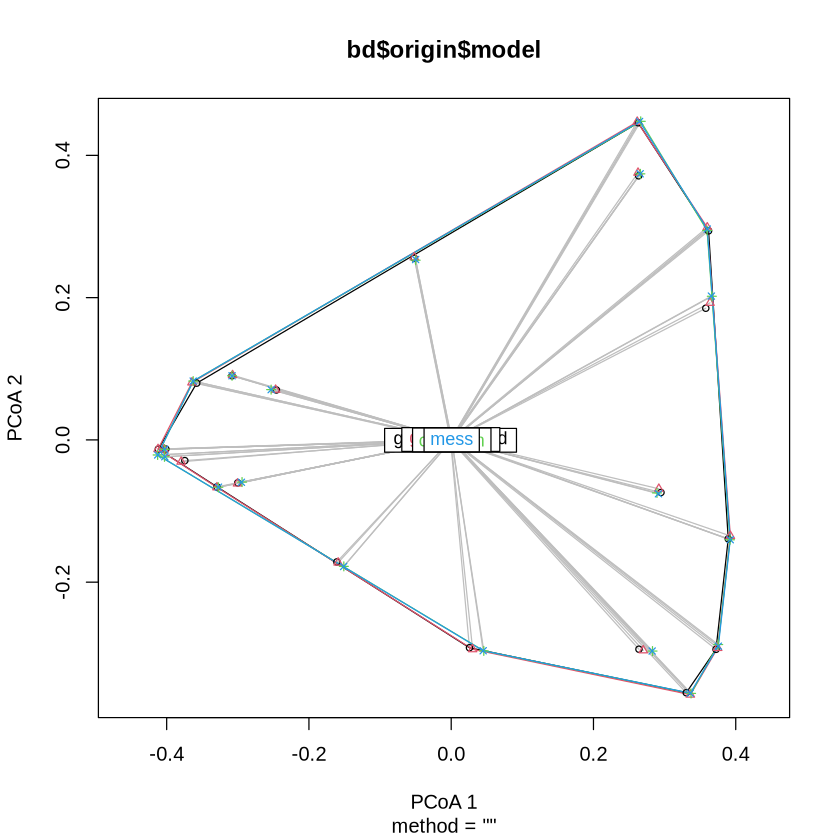

In [53]:
plot(bd$origin$model, label.cex = 0.9)

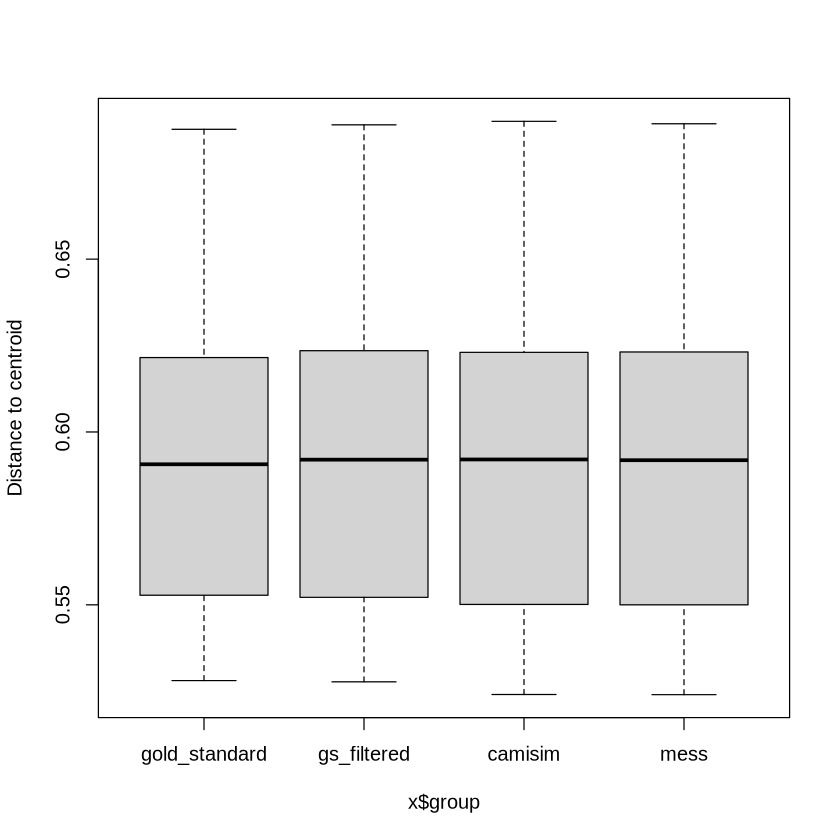

In [54]:
boxplot(bd$origin$model)

## Alpha diversities

In [55]:
alphadiv <- estimate_richness(ps, measures = c("Observed","Chao1","Shannon","Simpson",'InvSimpson'))
alphadiv$file <- rownames(alphadiv)

In [56]:
alphadiv <- inner_join(alphadiv, SAM, by="file") # add sample metadata

In [57]:
alphadiv <- subset(alphadiv, select = -c(richness,se.chao1,file))

In [58]:
head(alphadiv)

,Observed,Chao1,Shannon,Simpson,InvSimpson,sample,origin,body_site,simulated
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>
1,6033,7108.491,3.562834,0.9194075,12.408097,SRS013506,gold_standard,buccal mucosa,False
2,429,429.000,3.362463,0.9158293,11.880616,SRS013506,gs_filtered,buccal mucosa,False
3,3030,4892.547,2.875070,0.8109435,5.289424,SRS014475,gold_standard,throat,False
4,112,112.000,2.604895,0.7980092,4.950720,SRS014475,gs_filtered,throat,False
5,8005,8759.604,3.837867,0.9564747,22.975145,SRS014689,gold_standard,throat,False
6,333,333.000,3.662577,0.9548277,22.137437,SRS014689,gs_filtered,throat,False


In [59]:
alphadiv <- melt(alphadiv)

Using sample, origin, body_site, simulated as id variables



In [60]:
head(alphadiv)

,sample,origin,body_site,simulated,variable,value
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,SRS013506,gold_standard,buccal mucosa,False,Observed,6033
2,SRS013506,gs_filtered,buccal mucosa,False,Observed,429
3,SRS014475,gold_standard,throat,False,Observed,3030
4,SRS014475,gs_filtered,throat,False,Observed,112
5,SRS014689,gold_standard,throat,False,Observed,8005
6,SRS014689,gs_filtered,throat,False,Observed,333


In [61]:
names(alphadiv) <- c("sample","origin","bodysite", "simulated","alpha","value")

In [62]:
head(alphadiv)

,sample,origin,bodysite,simulated,alpha,value
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,SRS013506,gold_standard,buccal mucosa,False,Observed,6033
2,SRS013506,gs_filtered,buccal mucosa,False,Observed,429
3,SRS014475,gold_standard,throat,False,Observed,3030
4,SRS014475,gs_filtered,throat,False,Observed,112
5,SRS014689,gold_standard,throat,False,Observed,8005
6,SRS014689,gs_filtered,throat,False,Observed,333


In [77]:
sim_alpha <- subset(alphadiv,origin=='mess')
names(sim_alpha)[names((sim_alpha))=='value']='sim_alpha'
real_alpha <- subset(alphadiv,origin=='gold_standard')
names(real_alpha)[names((real_alpha))=='value']='real_alpha'
df=cbind(real_alpha,sim_alpha)
df=subset(df, select=which(!duplicated(names(df)))) 
r <- 'spearman'
cor=round(cor(df$sim_alpha, df$real_alpha, method = r), 3)
cors <- ddply(df, c("alpha"), summarise, cor=round(cor(real_alpha, sim_alpha,method=r), 5))
cors$x=c(200,200,1.25,0.29,6.5)
cors$y=c(11000,11000,3,0.6,20)
cors$r2=round(cors$cor^2,2)
c <- ggplot(df,aes(x=sim_alpha,y=real_alpha))+geom_point()
c <- c+facet_wrap(~alpha,scales='free',ncol = 2)+geom_smooth(method = "lm", se = TRUE)
c <- c + geom_text(data=cors, aes(x=x,y=y,label=paste(r,"'s ","r2=", r2, sep="")))

In [78]:
ggsave("alpha-divs.png",c, dpi = 400, units = "in")

Saving 6.67 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'
